# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1711058998007.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,03/20/2024,5224.62,5181.69,5226.19,5171.55
1,03/19/2024,5178.51,5139.09,5180.31,5131.59
2,03/18/2024,5149.42,5154.77,5175.60,5145.47
3,03/15/2024,5117.09,5123.31,5136.86,5104.35
4,03/14/2024,5150.48,5175.14,5176.85,5123.30
...,...,...,...,...,...
2527,03/27/2014,1849.04,1852.11,1855.55,1842.11
2528,03/26/2014,1852.56,1867.09,1875.92,1852.56
2529,03/25/2014,1865.62,1859.48,1871.87,1855.96
2530,03/24/2014,1857.44,1867.67,1873.34,1849.69


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2532.000000,2532.000000,2532.000000,2532.000000
mean,3067.721730,3055.083365,3071.533298,3037.516540
std,929.355027,954.938413,961.011861,949.044391
min,1815.690000,0.000000,0.000000,0.000000
25%,2159.880000,2158.460000,2164.990000,2146.735000
50%,2832.755000,2829.990000,2843.890000,2814.060000
75%,3962.910000,3960.105000,3982.182500,3929.875000
max,5224.620000,5181.690000,5226.190000,5171.550000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2517.000000,2517.000000,2517.000000,2517.000000
mean,3073.915904,3073.290060,3089.838025,3055.618546
std,928.620966,928.098771,934.060329,922.344942
min,1815.690000,1818.180000,1834.190000,1810.100000
25%,2164.250000,2165.130000,2170.200000,2156.510000
50%,2837.540000,2835.460000,2851.850000,2820.120000
75%,3966.840000,3963.720000,3990.710000,3935.740000
max,5224.620000,5181.690000,5226.190000,5171.550000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2531
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Open        2517 non-null   float64
 3   High        2517 non-null   float64
 4   Low         2517 non-null   float64
dtypes: float64(4), object(1)
memory usage: 118.0+ KB


In [5]:
df.shape

(2517, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

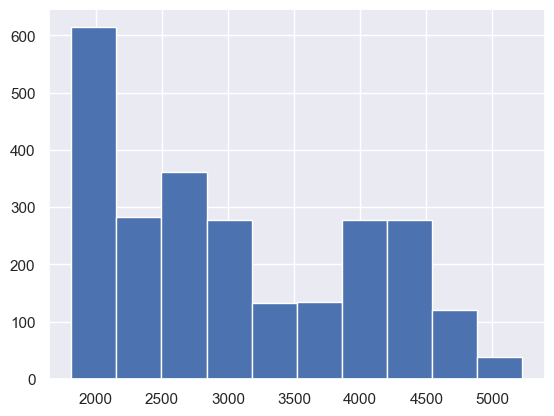

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

5224.62

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3073.9159038538

In [10]:
close_sd = df['Close/Last'].std()
close_sd

928.6209661818639

In [11]:
sigma1 = close_mean + close_sd
sigma1

4002.536870035664

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4931.157836217528

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5395.46831930846

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2531
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2014-03-21 to 2024-03-20')

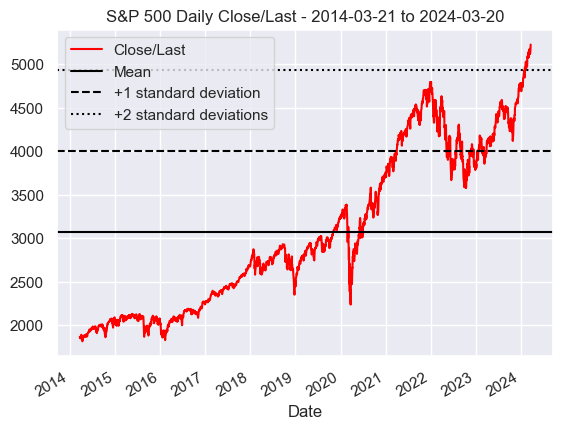

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2014-03-21 to 2024-03-20')

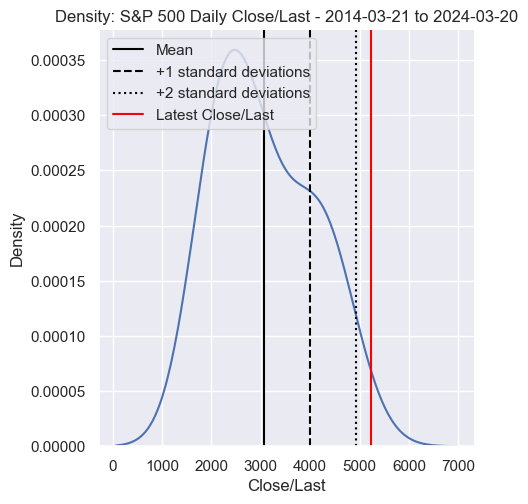

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.31601931732069

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results